In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## NumPy challenges:
<p>Create an array with shape (4, 3) of: a. all zeros b. ones c. numbers from 0 to 11 </p>

In [2]:
zeros = np.zeros((4, 3))
zeros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [3]:
ones = np.ones((4,3))
ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
randoms = np.arange(12).reshape((4, 3))
randoms

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## Tabulating the function F(x) = 2x^2 + 5 for x ∈ [1, 100] with a step of 1:

In [10]:


x_values = np.arange(1, 101)
f_values = 2 * x_values ** 2 + 5

print("x   |   F(x)")
print("--------------")
for x, f in zip(x_values, f_values):
    print(f"{x:3d} | {f:6d}")




x   |   F(x)
--------------
  1 |      7
  2 |     13
  3 |     23
  4 |     37
  5 |     55
  6 |     77
  7 |    103
  8 |    133
  9 |    167
 10 |    205
 11 |    247
 12 |    293
 13 |    343
 14 |    397
 15 |    455
 16 |    517
 17 |    583
 18 |    653
 19 |    727
 20 |    805
 21 |    887
 22 |    973
 23 |   1063
 24 |   1157
 25 |   1255
 26 |   1357
 27 |   1463
 28 |   1573
 29 |   1687
 30 |   1805
 31 |   1927
 32 |   2053
 33 |   2183
 34 |   2317
 35 |   2455
 36 |   2597
 37 |   2743
 38 |   2893
 39 |   3047
 40 |   3205
 41 |   3367
 42 |   3533
 43 |   3703
 44 |   3877
 45 |   4055
 46 |   4237
 47 |   4423
 48 |   4613
 49 |   4807
 50 |   5005
 51 |   5207
 52 |   5413
 53 |   5623
 54 |   5837
 55 |   6055
 56 |   6277
 57 |   6503
 58 |   6733
 59 |   6967
 60 |   7205
 61 |   7447
 62 |   7693
 63 |   7943
 64 |   8197
 65 |   8455
 66 |   8717
 67 |   8983
 68 |   9253
 69 |   9527
 70 |   9805
 71 |  10087
 72 |  10373
 73 |  10663
 74 |  10957
 75 |  112

## Tabulating the function F(x) = e^(-x) for x ∈ [-10, 10] with a step of 1:

In [11]:
x_values = np.arange(-10, 11)
f_values = np.exp(-x_values)

print("x   |   F(x)")
print("--------------")
for x, f in zip(x_values, f_values):
    print(f"{x:3d} | {f:.4f}")


x   |   F(x)
--------------
-10 | 22026.4658
 -9 | 8103.0839
 -8 | 2980.9580
 -7 | 1096.6332
 -6 | 403.4288
 -5 | 148.4132
 -4 | 54.5982
 -3 | 20.0855
 -2 | 7.3891
 -1 | 2.7183
  0 | 1.0000
  1 | 0.3679
  2 | 0.1353
  3 | 0.0498
  4 | 0.0183
  5 | 0.0067
  6 | 0.0025
  7 | 0.0009
  8 | 0.0003
  9 | 0.0001
 10 | 0.0000


# Pandas Challenges


## Import data

In [12]:
import pandas as pd
from io import StringIO

data = """Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20
Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1,2,18,7,20,74.1%,101,89,16,16,0,18,18,19
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0,0,9,5,12,70.6%,35,30,3,5,0,7,7,15
Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0,0,8,3,6,66.7%,48,56,3,7,1,7,7,17
Portugal,6,22,42,34.3%,9.3%,82,6,0,0,2,1891,1461,77.2%,2958,91,64,41,78,92,86,0,2,11,4,10,71.5%,73,90,10,12,0,14,14,16
Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,1,851,606,71.2%,1433,43,18,8,45,78,43,1,0,23,9,17,65.4%,43,51,11,6,1,10,10,17
Russia,5,9,31,22.5%,12.5%,59,2,0,0,1,1602,1345,83.9%,2278,40,40,21,65,74,58,0,0,8,3,10,77.0%,34,43,4,6,0,7,7,16
Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,4317,3820,88.4%,5585,69,106,44,122,102,79,0,5,8,1,15,93.8%,102,83,19,11,0,17,17,18
Sweden,5,17,19,47.2%,13.8%,39,3,0,0,1,1192,965,80.9%,1806,44,29,7,56,54,45,0,1,12,5,8,61.6%,35,51,7,7,0,9,9,18
Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,2,1276,1043,81.7%,1894,33,26,18,65,97,29,0,0,4,4,13,76.5%,48,31,4,5,0,9,9,18"""


df = pd.read_csv(StringIO(data))
df


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


## Select only the Team, Yellow Cards and Red Cards columns.


In [13]:
df[["Team", "Yellow Cards", "Red Cards"]]

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


## How many teams participated in the Euro2012?

In [17]:
df.Team.nunique()

16

## Filter teams that scored more than 6 goals


In [20]:
selected_rows = df[df["Goals"] > 6][["Team", "Goals"]]
selected_rows

,Team,Goals
5,Germany,10
13,Spain,12


# DataViz

In [31]:
tips = pd.read_csv("tips.csv")
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Use Cases: Visualize the relationship between two continuous variables.

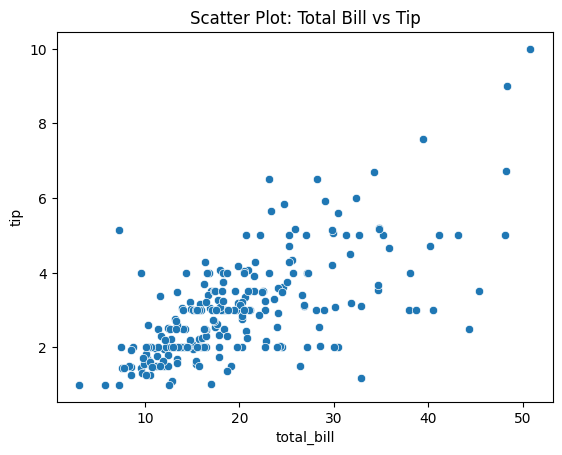

In [32]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Scatter Plot: Total Bill vs Tip")
plt.show()

## Use Cases: Show the trend of a continuous variable over a continuous axis.

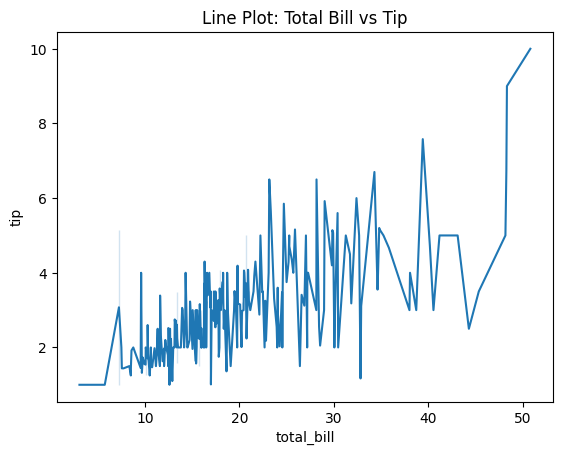

In [33]:
sns.lineplot(data=tips, x="total_bill", y="tip")
plt.title("Line Plot: Total Bill vs Tip")
plt.show()

## Use Cases: Compare values of a categorical variable across different groups.

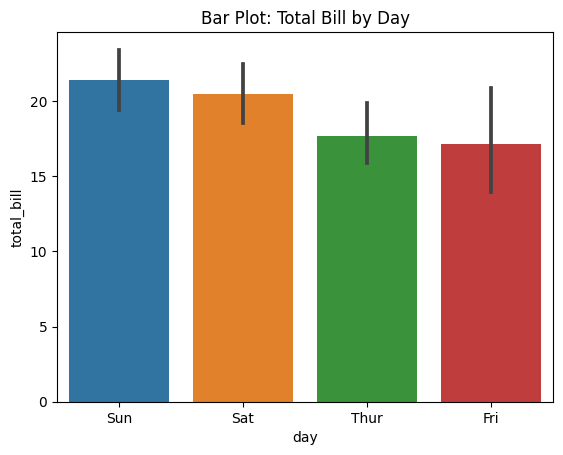

In [34]:
sns.barplot(data=tips, x="day", y="total_bill")
plt.title("Bar Plot: Total Bill by Day")
plt.show()

## Use Cases: Display the distribution of a continuous variable.

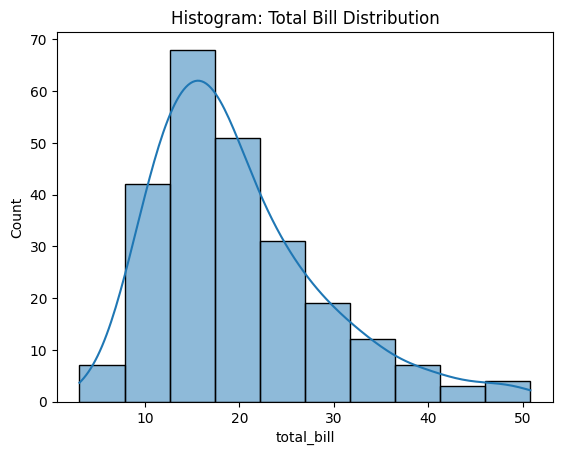

In [35]:
sns.histplot(data=tips, x="total_bill", bins=10, kde=True)
plt.title("Histogram: Total Bill Distribution")
plt.show()

## Use Cases: Visualize the distribution and identify outliers in a continuous variable across different categories.

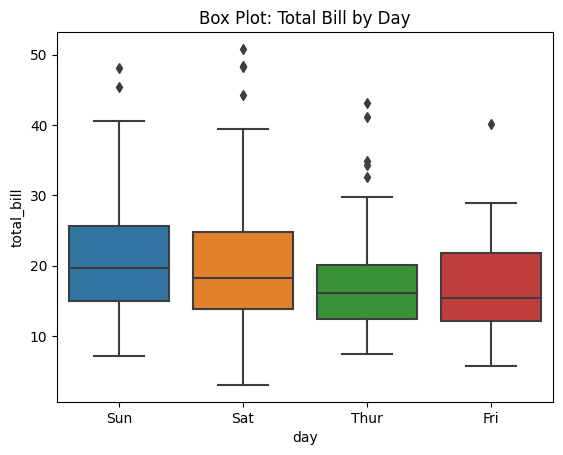

In [36]:
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Box Plot: Total Bill by Day")
plt.show()

## Use Cases: Combine a box plot with a KDE to visualize the distribution of a continuous variable across different categories.

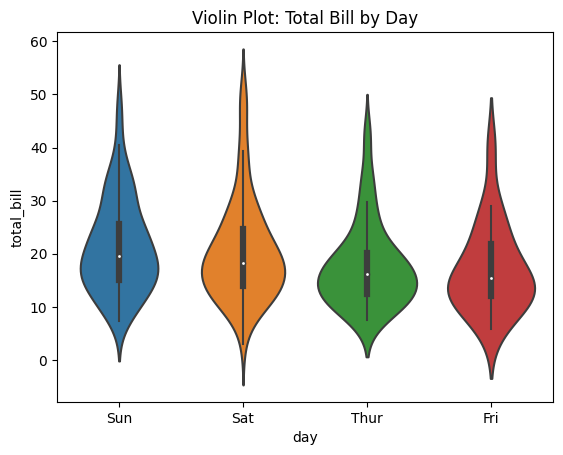

In [37]:
sns.violinplot(data=tips, x="day", y="total_bill")
plt.title("Violin Plot: Total Bill by Day")
plt.show()

## Use Cases: Explore the relationships between multiple numeric variables in a dataset.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


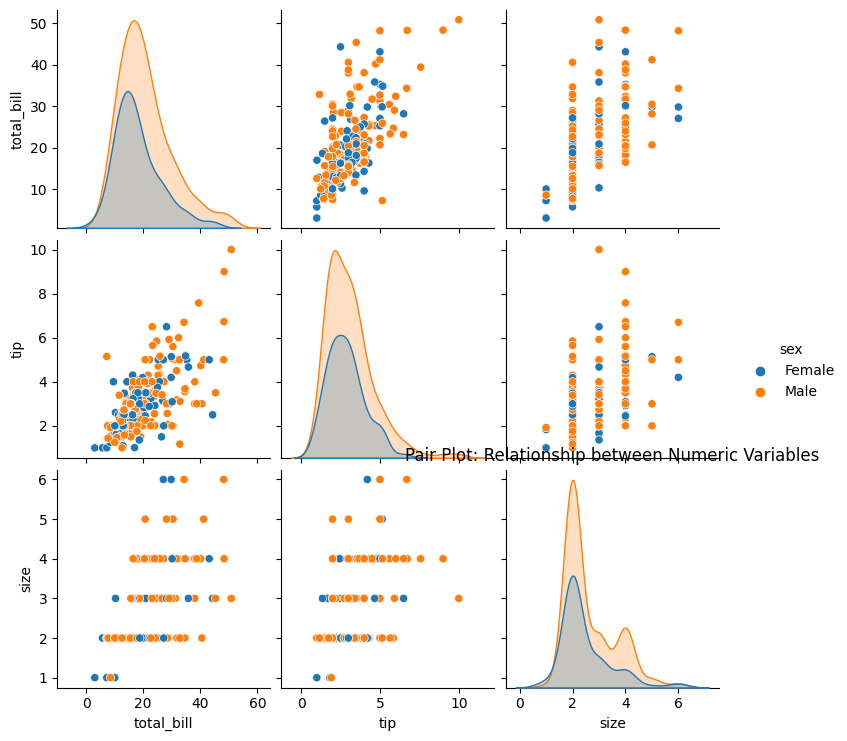

In [38]:
sns.pairplot(data=tips, hue="sex")
plt.title("Pair Plot: Relationship between Numeric Variables")
plt.show()